<a href="https://colab.research.google.com/github/Thiagogiovanni/projetos_de_estudo/blob/main/prevendo_fraudes_cartoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prevendo fraudes em cartões de créditos

De acordo com os dados do **Annual Report** de 2020 o Brasil foi o país com maior quantidade de vazamento de dados de cartões, representando sozinho cerca de 45% dos casos totais do mundo. Além disso, o Brasil é o país com maior número de pessoas insatisfeitas com o tratamento dos bancos após essa experiência.

Tendo em vista que com o avanço da tecnologia se abrem novas brechas para fraudes é necessário que em paralelo a isso se tenha um avanço nos métodos, tanto para prevenir, quanto para detectá-las.

<center><img width="50%" src='https://www.riotimesonline.com/wp-content/uploads/2021/02/Card-Fraud.jpeg'></center>


O objetivo desse notebook é desenvolver um método para prever fraudes em cartões de crédito.



## Obtenção dos dados

Os dados podem ser encontrados [aqui](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

Essa é uma base voltada para estudos, que por questões de confidencialidade, tiveram algumas de suas informações 'ocultas', pelo método [PCA](https://builtin.com/data-science/step-step-explanation-principal-component-analysis). A ideia é que os valores reais não estarão sendo mostrados mas terão sua 'proporcionalidade' mantida, não afetando o modelo.

Apenas as colunas *Amount* e *Time* não foram modificadas pelo método.

In [ ]:
# Vamos importar as bibliotecas iniciais

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar o dataset

df = pd.read_csv('/content/creditcard.csv')

# Ver as primeiras entradas

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Análise Exploratória

Faremos uma análise exploratória para entender como é o nosso *dataset*

Vale ressaltarmos que nosso objetivo é prever valores de *Class*, sendo que:

* *Class* = 0 são **casos válidos**
* *Class* = 1 são **casos fraudulentos**

In [ ]:
# Analisando as dimensões

print("Entradas: \t {} \nColunas: \t {} ".format(df.shape[0], df.shape[1]))

Entradas: 	 284807 
Colunas: 	 31 


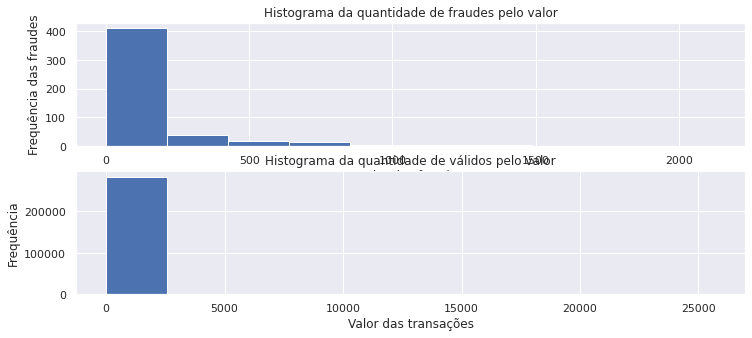

In [ ]:
# Como foi dito, as unicas colunas não padronizadas foram Time e Amount, vamos ver como a Amount se distribui por meio de um histograma

df_fraudes = df[df['Class']==1]
df_validos = df[df['Class']==0]

# Plotar histograma do valor das fraudes e valor das não fraudes

sns.set()
fig, ax = plt.subplots(nrows = 2, figsize = (12,5))

# Histograma fraudes
ax[0].hist('Amount', data = df_fraudes)
ax[0].set_title('Histograma da quantidade de fraudes pelo valor')
ax[0].set_xlabel('Valor das fraudes')
ax[0].set_ylabel('Frequência das fraudes')


# Histograma não fraudes

ax[1].hist('Amount', data = df_validos)
ax[1].set_title('Histograma da quantidade de válidos pelo valor')
ax[1].set_xlabel('Valor das transações')
ax[1].set_ylabel('Frequência')
plt.show()

Vamos ter uma noção maior sobre nossos dados

Olhando para as informações abaixo de *Amount* conseguimos concluir, principalmente pelo std+mean que grande parte das transações são de valores mais baixos.

Temos o valor máximo de **25691**, o que dá uma ideia do motivo do desvio padrão ser tão grande.

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Verificando o tipo das variáveis e se há valores nulos concluimos que estão todas no formato que precisamos para aplicar o método e não temos valores ausentes.

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
(df.isnull().sum()).sort_values(ascending=False)

Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64

Vamos entender como é a distribuição dos casos fraudulentos e válidos

In [ ]:
print('Temos um total de {} casos de fraude e {} de transações normais \nAs fraudes representam {:.2f}% do total'.format(df_fraudes.shape[0], df_validos.shape[0],df_fraudes.shape[0]/(df_fraudes.shape[0]+df_validos.shape[0])*100 ))

Temos um total de 492 casos de fraude e 284315 de transações normais 
As fraudes representam 0.17% do total


## Método a ser utilizado

Para essa previsão utilizaremos o método de **Regressão Logística**, porém, para fins de estudo irei aplicá-lo de diferentes formas e analisar os desempenhos.

A ideia será aplicar o método para diferentes bases de treino. A motivação para isso ocorre pois os **dados estão muito desbalanceados** (temos 0.17% de fraudes), ou seja, iremos fazer diferentes avaliações com diferentes bases de treino e escolher a melhor.

Vale ressaltar como iremos definir qual é a **melhor**.

Tendo em vista que a enorme maioria dos dados são não fraudulentos, é natural pensarmos que qualquer modelo que façamos irá ter um acerto (geral) extremamente alto (mostraremos isso na prática).

Porém nosso objetivo aqui é conseguir diminuir os erros relacionados a transação ser fraudulenta ou não, ou seja, não iremos analisar o acerto geral, mas quanto dos casos fraudulentos conseguimos prever, essa métrica de avaliação se chama **Recall**, iremos nos basear nela.

A regressão logística possui a necessidade de termos valores dentro de uma certa ordem de grandeza, ou seja, nosso primeiro passo será preparar as colunas *Time* e *Amount* para não haver erros futuros

In [ ]:
# Usaremos o StandardScaler para fazer isso

from sklearn.preprocessing import StandardScaler

df_clean = df.copy()

scaler = StandardScaler()

# vamos padronizar a coluna Amount (agora terá a coluna amount com os valores padronizados)

df_clean['amount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))

# o mesmo para time

df_clean['time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

# tirando as colunas antigas

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)


## Modelo sem balanceamento de dados

In [ ]:
# 1. Usaremos modelo de regressão logistica

from sklearn.linear_model import LogisticRegression

# 2. Instanciar o modelo

model = LogisticRegression()

# 3. Ajustar bases para quebrar em treino e teste

X = df_clean.drop('Class', axis = 1)
y = df_clean.Class

# 3.1 Definindo treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size = 0.25)

# 4. Treinar o modelo

model.fit(X_train, y_train)

# 5. Prever o resultado

y_pred = model.predict(X_test)


In [ ]:
# Analisando metricas

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.90      0.61      0.73       123

    accuracy                           1.00     71202
   macro avg       0.95      0.80      0.86     71202
weighted avg       1.00      1.00      1.00     71202



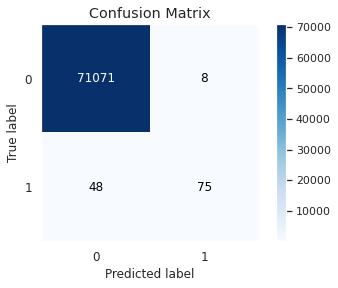

In [ ]:
# Plotando a matriz de confusão
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred)

### Primeiro resultado do método 

Como foi dito, nosso objetivo é maximizar o valor do Recall referente aos casos fraudulentos, que nesse caso foi de 61%, ou seja, de todos fraudulentos conseguimos prever apenas **61%**. 

Veja que nossa hipótese inicial da acurácia ser muito alta foi comprada, no caso ela está tão proxima de 100% que foi arredondada para 1.

Analisando a matriz de confusão percebemos que do total de 123 fraudulentos, na base de teste, conseguimos prever apenas 75 e tivemos 6 casos de Falso Positivo.

## Métodos de balanceamento dos dados.

Existem diversas formas de fazermos o balanceamento, irei destracar dois jeitos famosos:

* **Undersampling**: Esse método reduz o desbalanceamento do *dataset* focando na classe majoritária, ou seja, ele elimina entradas da classe com maior número de ocorrências. Consequentemente, o método pode ter uma maior quantidade de Falsos-Positivos, pois pode se tornar mais difícil prever dados da classe majoritária (no nosso caso não fraudulentos).

* **Oversampling**: Cria novas observações da classe minoritária a partir das informações contidas nos dados originais. Com um argumento análogo podemos concluir que usando tal balanceamento iremos deteriorar o resultado sobre a variável minoritária (não queremos isso)

Nosso objetivo será aplicar o método usando o balanceamento do tipo Undersampling, pois pelo o que foi dito, será uma forma melhor de fazermos isso (queremos aumentar a eficácia em achar fraudes - classe minoritária).

## Modelo com balanceamento Undersampling

In [ ]:
# Vamos começar usando o Undersampling:

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

# Faremos tal balanceamento dentro das bases de treino, pois não queremos desconfigurar a base de teste.

X_res, y_res = rus.fit_resample(X_train, y_train)

# Veja como está distribuido, agora:

print('Tinhamos na base de treino y:\n{} \nAgora temos:\n{}'.format(y_train.value_counts(),y_res.value_counts()))

Tinhamos na base de treino y:
0    213236
1       369
Name: Class, dtype: int64 
Agora temos:
0    369
1    369
Name: Class, dtype: int64


In [ ]:
# Instanciar novo modelo
model2 = LogisticRegression()

# Treinar ele
model2.fit(X_res, y_res)

# Previsão dos novos dados

y_pred2 = model2.predict(X_test)

In [ ]:
# Analisando metricas e gerando matriz de confusao

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.05      0.91      0.09       123

    accuracy                           0.97     71202
   macro avg       0.52      0.94      0.53     71202
weighted avg       1.00      0.97      0.98     71202



### Segundo resultado do método

Nesse caso já tivemos um resultado bem melhor do que o anterior, veja que nossa métrica foco (Recall) está na casa dos 91%, ou seja, de todos casos da nossa base de teste, que eram fraudulentos, conseguimos prever 91%, um ótimo resultado.

Podemos analisar a matriz de confusão referente a essa previsão

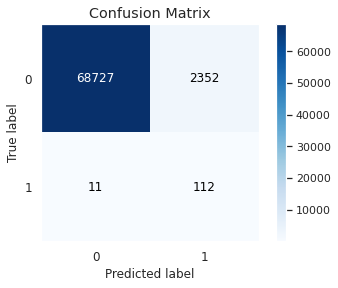

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred2)

Veja que na matriz conseguimos notar o que foi comentado na parte da apresentação dos modelos (de piorar na avaliação dos casos da classe majoritária)

Podemos observar que tivemos uma quantidade consideravel de Falsos-Positivos, ou seja, aqueles que julgamos ser fraudulentos e não eram (2006 casos), porém, em compensação, dos 123 fraudadores conseguimos prever 112.

Vale comparamos essa segunda matriz e a primeira para termos uma outra forma de mostrar a eficácia do balanceamento na detecção das fraudes e o 'problema' de mais falsos positivos.

## Conclusões

* Para um melhor desempenho do método de Regressão Logística podemos balancear melhor os dados.

* Mesmo com uma base bem tratada, com quase todos valores padronizados, sem valores ausentes e com variáveis categóricas tivemos que analisar como o *dataset* estava distribuido, com isso tivemos que padronizar as colunas necessárias e balancear os dados, para rodar um modelo efetivo.

* Entender sobre o que se trata os dados e o que gostariamos de ter como resultado (prever mais fraudes) foi de extrema importância, concluir que poderiamos correr o risco de ter mais Falsos Positivos em prol de prever uma maior quantidade de fraudes foi essencial.

* Num cenário real, o ideal seria testarmos diferentes formas de balanceamento e de otimização, para que no final fosse possível apresentar os resultados para que o 'contratante' escolhesse o melhor para ele, por exemplo, um método que obteve **mais falsos positivos**, porém **maior quantidade de acertos** nas fraudes, um que teve **menos FP**, mas uma **menor acertividade** ou um **meio termo**, essas são decisões que valem ser discutidas.

